In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df = pd.DataFrame(data)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
imputer = SimpleImputer(strategy = 'median')

impute_cols = ['Time_spent_Alone', 'Social_event_attendance', 
'Going_outside', 'Friends_circle_size', 'Post_frequency']

df[impute_cols] = imputer.fit_transform(df[impute_cols])

In [6]:
cols_mode = ['Stage_fear', 'Drained_after_socializing']

for i in cols_mode:
    df[i] = df[i].fillna(df[i].mode()[0])

In [7]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [8]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [9]:
encoder = LabelEncoder()

cols_to_encode = ['Stage_fear', 'Drained_after_socializing', 'Personality']

for i in cols_to_encode:
    df[i] = encoder.fit_transform(df[i])

In [10]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [11]:
float_cols = ['Time_spent_Alone', 'Social_event_attendance', 
              'Going_outside', 'Friends_circle_size', 'Post_frequency']

df[float_cols] = df[float_cols].astype(int)

In [12]:
scaler = StandardScaler()

cols_to_scale = ['Time_spent_Alone', 'Social_event_attendance', 
                 'Going_outside', 'Friends_circle_size', 'Post_frequency']

for i in cols_to_scale:
    df[i] = scaler.fit_transform(df[[i]])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


In [14]:
target_corr = df.corr()['Personality'].sort_values(ascending = False)
print(target_corr)

Personality                  1.000000
Stage_fear                   0.847467
Drained_after_socializing    0.845388
Time_spent_Alone             0.712467
Friends_circle_size         -0.686321
Post_frequency              -0.720817
Social_event_attendance     -0.721568
Going_outside               -0.739251
Name: Personality, dtype: float64


In [15]:
float_cols = ['Time_spent_Alone', 'Social_event_attendance', 
              'Going_outside', 'Friends_circle_size', 'Post_frequency']

df[float_cols] = df[float_cols].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Time_spent_Alone           2900 non-null   int64
 1   Stage_fear                 2900 non-null   int64
 2   Social_event_attendance    2900 non-null   int64
 3   Going_outside              2900 non-null   int64
 4   Drained_after_socializing  2900 non-null   int64
 5   Friends_circle_size        2900 non-null   int64
 6   Post_frequency             2900 non-null   int64
 7   Personality                2900 non-null   int64
dtypes: int64(8)
memory usage: 181.4 KB


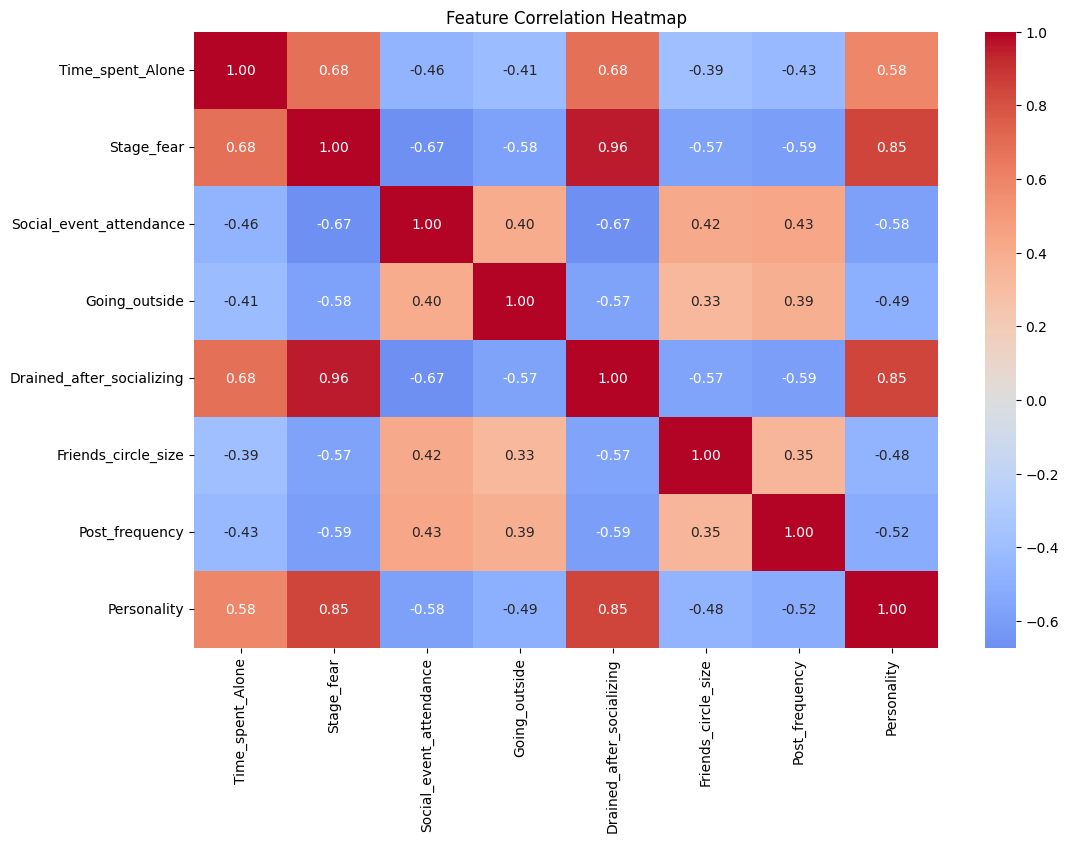

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', center = 0, fmt = ".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0,0,1,0,1,0,0
1,1,1,-1,-1,1,-1,0,1
2,1,1,-1,0,1,0,0,1
3,-1,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,0


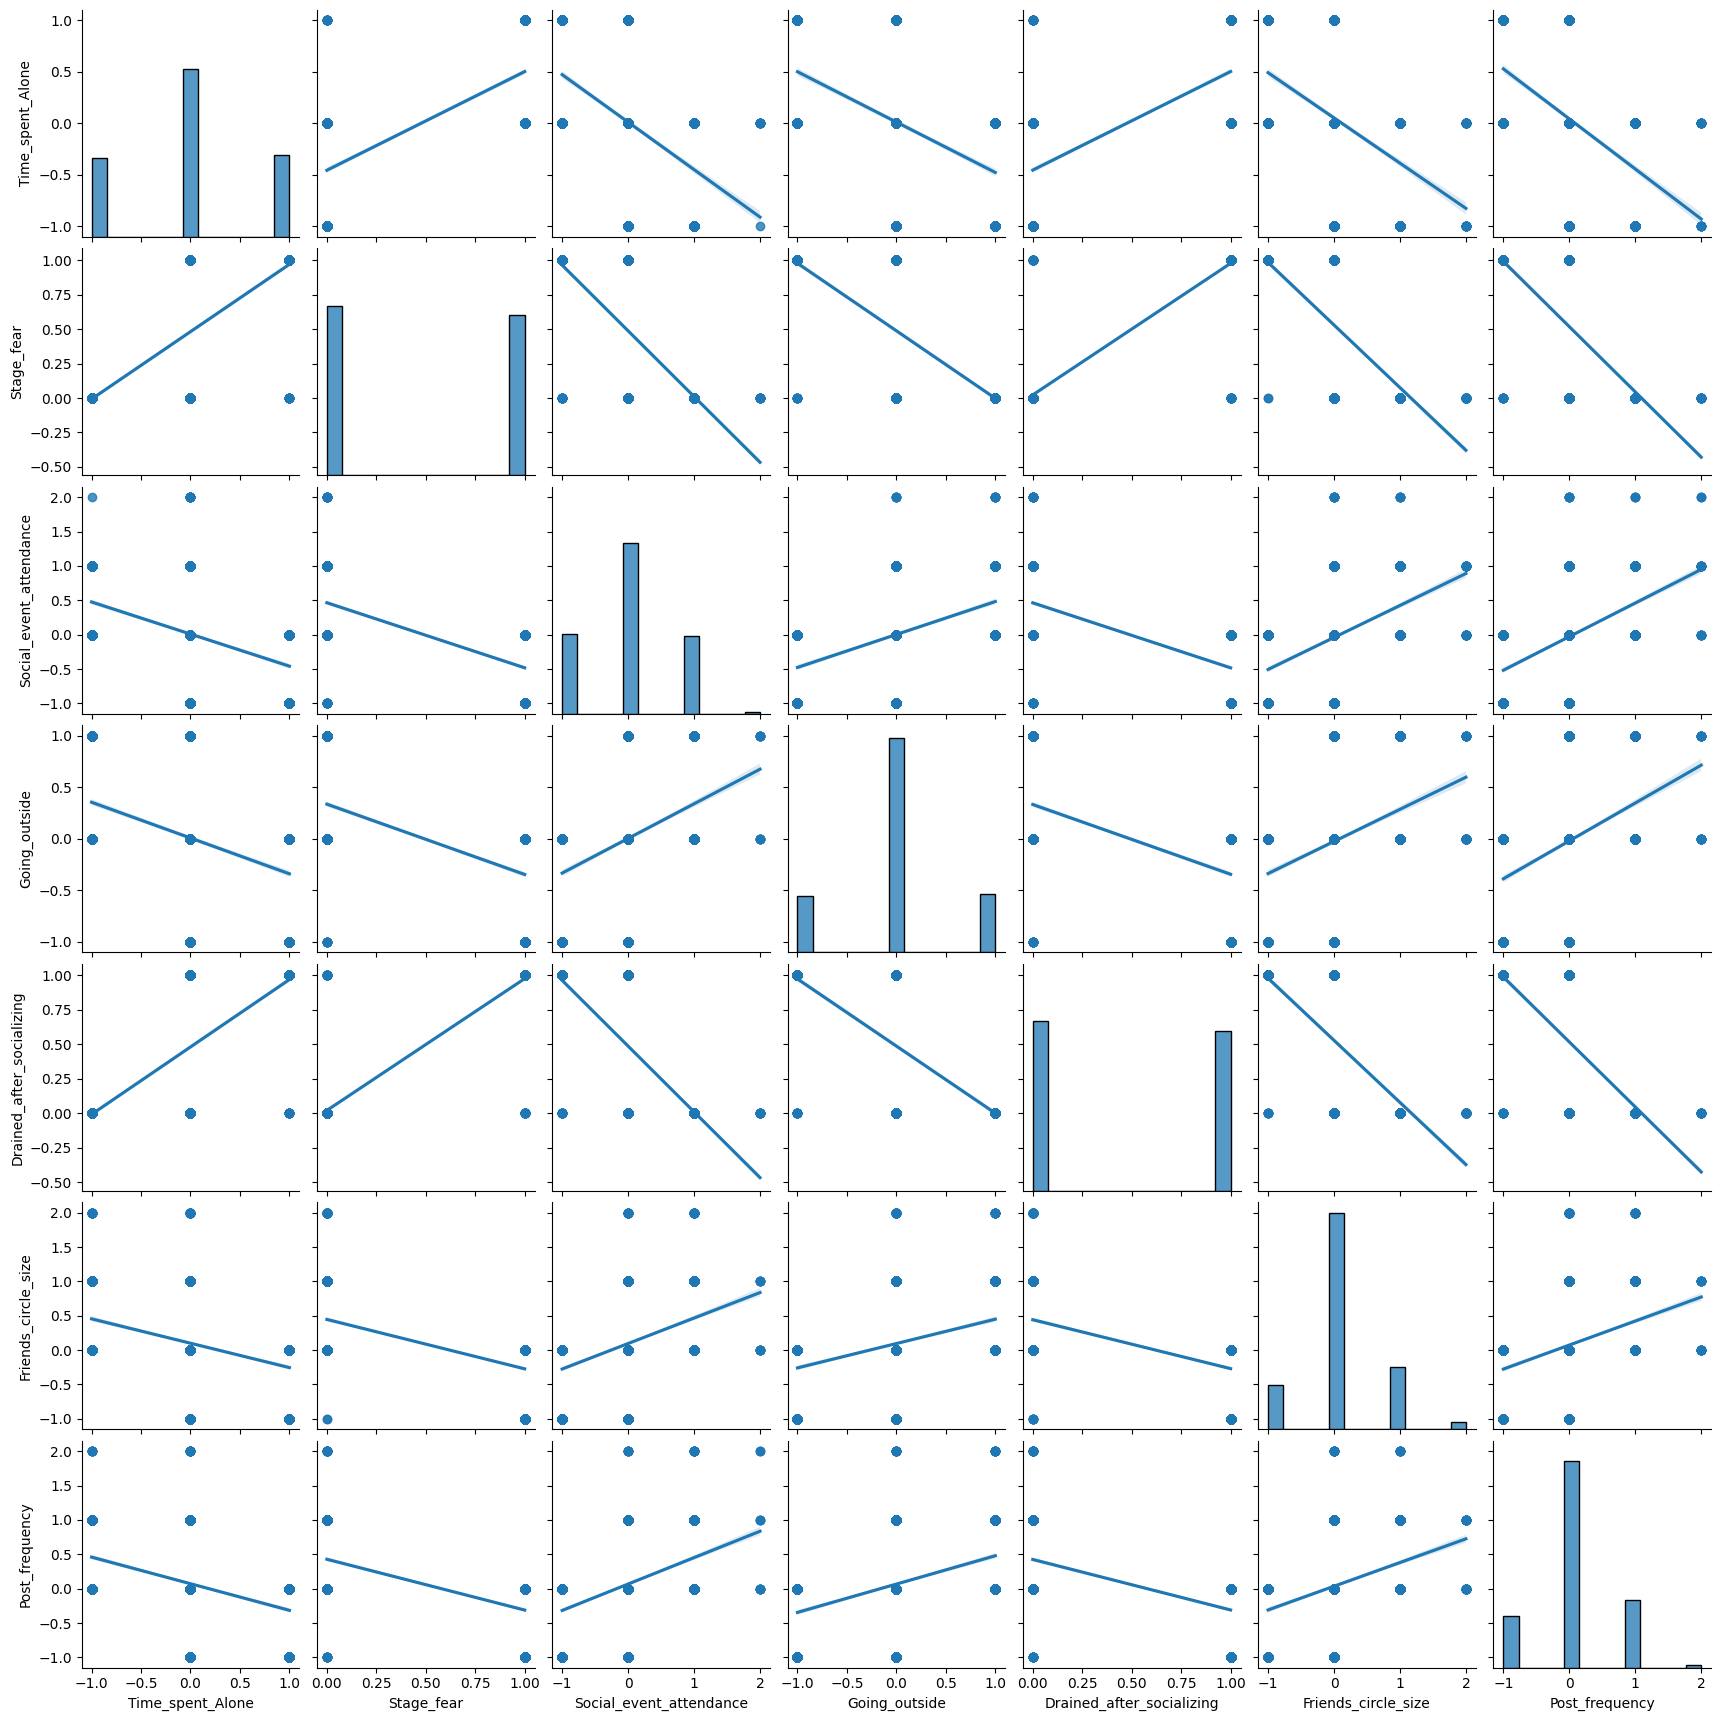

In [19]:
sns.pairplot(df, vars = ['Time_spent_Alone', 'Stage_fear', 
                         'Social_event_attendance', 'Going_outside', 'Drained_after_socializing',
                         'Friends_circle_size', 'Post_frequency'
                        ], kind = 'reg')
plt.show()

In [20]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0,0,1,0,1,0,0
1,1,1,-1,-1,1,-1,0,1
2,1,1,-1,0,1,0,0,1
3,-1,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,0


In [21]:
x = df.drop(columns = ['Personality'], axis = 1)
y = df['Personality']

print(x.shape)
print(y.shape)

(2900, 7)
(2900,)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42, stratify = y)
logistic = LogisticRegression(class_weight = 'balanced', 
                              penalty = 'l2', C = 0.1, solver = 'liblinear')

logistic.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

In [23]:
train_pred = logistic.predict(x_train)
accuracy = accuracy_score(train_pred, y_train)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9348659003831418


In [24]:
test_pred = logistic.predict(x_test)
accuracy = accuracy_score(test_pred, y_test)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9275862068965517


In [25]:
scores = cross_val_score(logistic ,x_train, y_train, cv = 5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9337164750957854


In [26]:
testscores = cross_val_score(logistic ,x_test, y_test, cv = 5)
print("Cross-Validation Accuracy:", testscores.mean())

Cross-Validation Accuracy: 0.9275862068965518


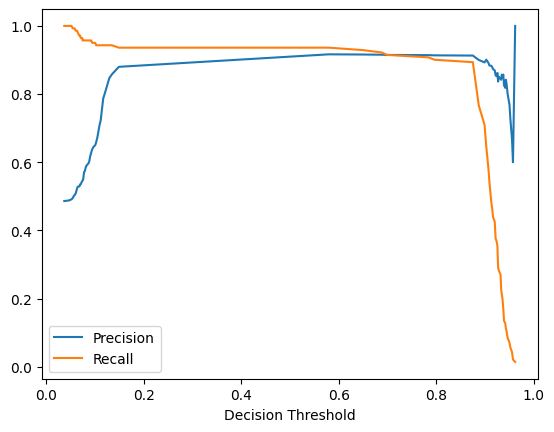

In [27]:
from sklearn.metrics import precision_recall_curve

y_scores = logistic.predict_proba(x_test)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.legend()
plt.show()

Top Predictive Features:
                     Feature  Coefficient
1                 Stage_fear     1.866426
4  Drained_after_socializing     1.825254
6             Post_frequency    -0.430256
2    Social_event_attendance    -0.331955
0           Time_spent_Alone     0.240894
3              Going_outside    -0.163667
5        Friends_circle_size    -0.117041


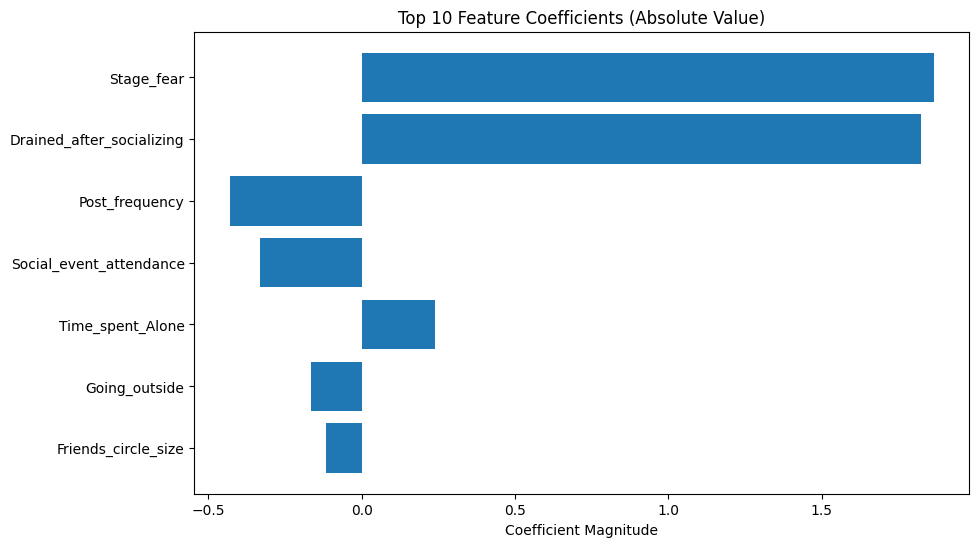

In [28]:
importance = pd.DataFrame({
    'Feature': x_train.columns,  
    'Coefficient': logistic.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Top Predictive Features:")
print(importance.head(10))

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'][:10], importance['Coefficient'][:10])
plt.title("Top 10 Feature Coefficients (Absolute Value)")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()  
plt.show()